In [1]:
#Import Library
import pandas as pd

In [16]:
#Load the dataset
df = pd.read_csv('/content/Zomato_Project.csv', encoding='ISO-8859-1')

In [17]:
df

,RestaurantID,CountryCode,Country,City,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Average_Cost_for_two,Rating,Datekey_Opening,Average Ratings,Price Range
0,18435314,1,India,New Delhi,North Indian,No,No,No,No,300,1.0,2013-09-21,1-1.99,201-400
1,18378015,1,India,New Delhi,North Indian,No,No,No,No,200,1.0,2016-09-10,1-1.99,0-200
2,18424905,1,India,New Delhi,North Indian,No,Yes,No,No,400,1.0,2018-09-25,1-1.99,201-400
3,18180072,1,India,New Delhi,North Indian,No,No,No,No,100,1.0,2018-09-06,1-1.99,0-200
4,18415377,1,India,New Delhi,North Indian,No,No,No,No,150,1.0,2013-09-17,1-1.99,0-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,7101042,148,New Zealand,Wellington City,Cafe,No,No,No,No,50,4.6,2011-10-03,4-4.99,0-200
9547,7100502,148,New Zealand,Wellington City,"Cafe, European, Mexican",No,No,No,No,50,4.4,2013-10-01,4-4.99,0-200
9548,6900992,215,UK,Birmingham,"Pakistani, Indian",No,No,No,No,45,3.7,2017-10-28,3-3.99,0-200
9549,5800590,191,Sri Lanka,Colombo,"Cafe, Sri Lankan, Continental, American",No,No,No,No,2500,4.0,2015-10-23,4-4.99,2001-3000


In [31]:
#Check Column Names and Types
print(df.columns)
print(df.dtypes)

Index(['RestaurantID', 'CountryCode', 'Country', 'City', 'Cuisines',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Average_Cost_for_two', 'Rating',
       'Datekey_Opening', 'Average Ratings', 'Price Range', 'Year', 'Quarter',
       'Month', 'RatingBucket', 'PriceBucket'],
      dtype='object')
RestaurantID                     int64
CountryCode                      int64
Country                         object
City                            object
Cuisines                        object
Has_Table_booking               object
Has_Online_delivery             object
Is_delivering_now               object
Switch_to_order_menu            object
Average_Cost_for_two             int64
Rating                         float64
Datekey_Opening         datetime64[ns]
Average Ratings                 object
Price Range                     object
Year                             int32
Quarter                          int32
Month                

In [19]:
#Information of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   CountryCode           9551 non-null   int64  
 2   Country               9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Has_Table_booking     9551 non-null   object 
 6   Has_Online_delivery   9551 non-null   object 
 7   Is_delivering_now     9551 non-null   object 
 8   Switch_to_order_menu  9551 non-null   object 
 9   Average_Cost_for_two  9551 non-null   int64  
 10  Rating                9551 non-null   float64
 11  Datekey_Opening       9551 non-null   object 
 12  Average Ratings       9551 non-null   object 
 13  Price Range           9551 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.0+ MB


In [20]:
#Description of numerical columns
df.describe()

,RestaurantID,CountryCode,Average_Cost_for_two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,1199.210763,2.891268
std,8.791521e+06,56.750546,16121.183073,1.128845
min,5.300000e+01,1.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,700.000000,3.700000
max,1.850065e+07,216.000000,800000.000000,4.900000


In [21]:
#📌 1. Number of Restaurants by City and Country
city_country_counts = df.groupby(['City', 'CountryCode'])['RestaurantID'].nunique().reset_index(name='RestaurantCount')
print(city_country_counts)


                City  CountryCode  RestaurantCount
0          Abu Dhabi          214               20
1               Agra            1               20
2          Ahmedabad            1               21
3             Albany          216               20
4          Allahabad            1               20
..               ...          ...              ...
136          Weirton          216                1
137  Wellington City          148               20
138   Winchester Bay          216                1
139          Yorkton           37                1
140        ÛÁstanbul          208               14

[141 rows x 3 columns]


In [22]:
#📌 2. Restaurants Opened by Year, Quarter, Month
df['Datekey_Opening'] = pd.to_datetime(df['Datekey_Opening'])

df['Year'] = df['Datekey_Opening'].dt.year
df['Quarter'] = df['Datekey_Opening'].dt.quarter
df['Month'] = df['Datekey_Opening'].dt.month

openings_by_time = df.groupby(['Year', 'Quarter', 'Month'])['RestaurantID'].nunique().reset_index(name='RestaurantCount')
print(openings_by_time)


     Year  Quarter  Month  RestaurantCount
0    2010        1      1               83
1    2010        1      2               77
2    2010        1      3               90
3    2010        2      4               91
4    2010        2      5               77
..    ...      ...    ...              ...
103  2018        3      8               78
104  2018        3      9              103
105  2018        4     10               95
106  2018        4     11               92
107  2018        4     12               92

[108 rows x 4 columns]


In [23]:
#📌 3. Count of Restaurants by Average Ratings (Buckets)
rating_bins = [0, 1.99, 2.99, 3.99, 4.99, 5]
rating_labels = ['0-1.99', '2-2.99', '3-3.99', '4-4.99', '5']
df['RatingBucket'] = pd.cut(df['Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

rating_counts = df['RatingBucket'].value_counts().sort_index().reset_index(name='RestaurantCount')
rating_counts.columns = ['RatingBucket', 'RestaurantCount']
print(rating_counts)


  RatingBucket  RestaurantCount
0       0-1.99             2151
1       2-2.99             1430
2       3-3.99             4590
3       4-4.99             1380
4            5                0


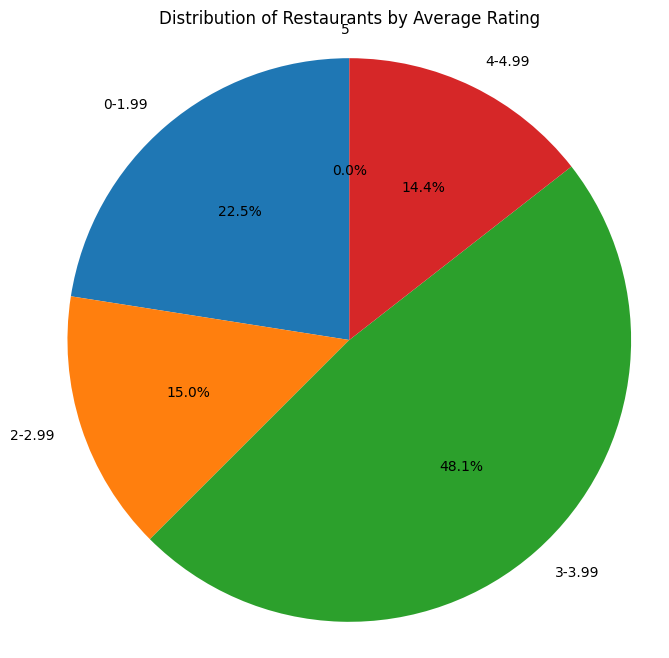

In [32]:
#rating_bins = [0, 1.99, 2.99, 3.99, 4.99, 5]
# rating_labels = ['0-1.99', '2-2.99', '3-3.99', '4-4.99', '5']
# df['RatingBucket'] = pd.cut(df['Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)
# rating_counts = df['RatingBucket'].value_counts().sort_index().reset_index(name='RestaurantCount')
# rating_counts.columns = ['RatingBucket', 'RestaurantCount']
# print(rating_counts)
#  pie chart

import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts['RestaurantCount'], labels=rating_counts['RatingBucket'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Restaurants by Average Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [24]:
#📌 4. Count of Restaurants by Average Price Buckets
price_bins = [0, 200, 400, 600, 800, 10000]
price_labels = ['0-200', '201-400', '401-600', '601-800', '800+']
df['PriceBucket'] = pd.cut(df['Average_Cost_for_two'], bins=price_bins, labels=price_labels, include_lowest=True)

price_counts = df['PriceBucket'].value_counts().sort_index().reset_index(name='RestaurantCount')
price_counts.columns = ['PriceBucket', 'RestaurantCount']
print(price_counts)


  PriceBucket  RestaurantCount
0       0-200             2135
1     201-400             2701
2     401-600             2077
3     601-800              996
4        800+             1621


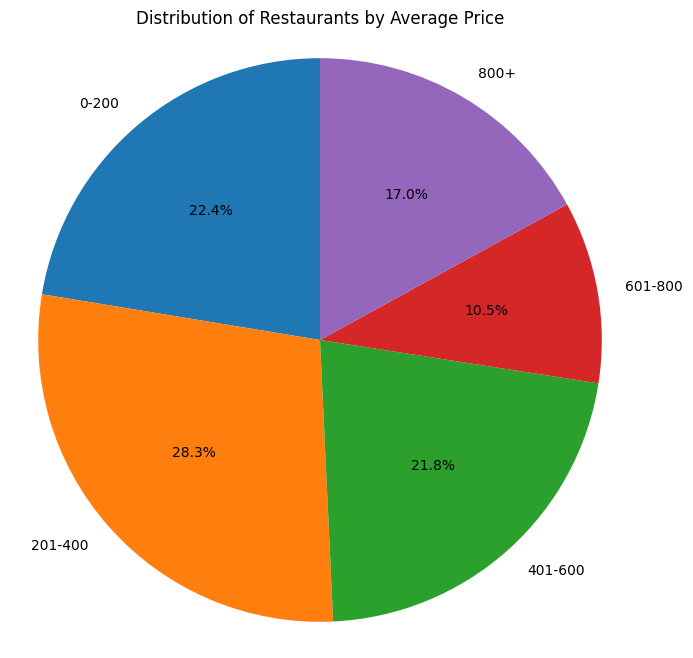

In [33]:
# prompt: #📌 4. Count of Restaurants by Average Price Buckets
# price_bins = [0, 200, 400, 600, 800, 10000]
# price_labels = ['0-200', '201-400', '401-600', '601-800', '800+']
# df['PriceBucket'] = pd.cut(df['Average_Cost_for_two'], bins=price_bins, labels=price_labels, include_lowest=True)
# price_counts = df['PriceBucket'].value_counts().sort_index().reset_index(name='RestaurantCount')
# price_counts.columns = ['PriceBucket', 'RestaurantCount']
# print(price_counts) pie chart

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_counts['RestaurantCount'], labels=price_counts['PriceBucket'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Restaurants by Average Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [29]:
#📌 5. Percentage of Restaurants with Table Booking
table_booking_percent = df['Has_Table_booking'].value_counts(normalize=True) * 100
print(table_booking_percent.astype(str) + '%')


Has_Table_booking
No      87.87561511883573%
Yes    12.124384881164275%
Name: proportion, dtype: object


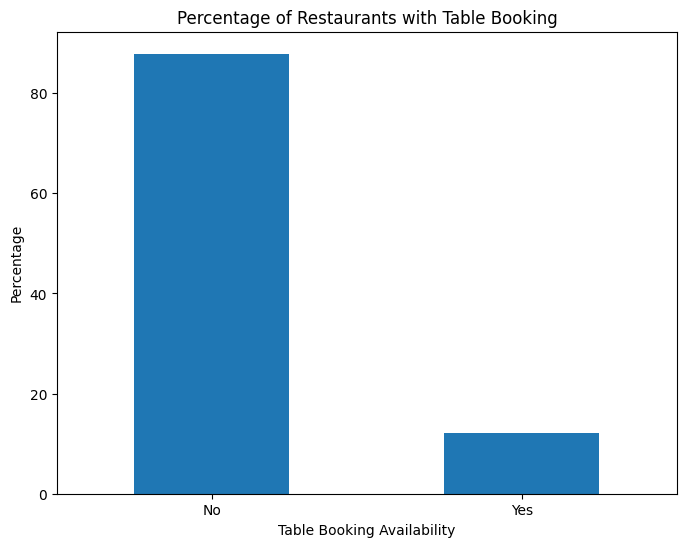

In [34]:
# prompt: #📌 5. Percentage of Restaurants with Table Booking
# table_booking_percent = df['Has_Table_booking'].value_counts(normalize=True) * 100
# print(table_booking_percent.astype(str) + '%') bar chart

# Create the bar chart
plt.figure(figsize=(8, 6))
table_booking_percent.plot(kind='bar')
plt.title('Percentage of Restaurants with Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


In [30]:
#📌 6. Percentage of Restaurants with Online Delivery
online_delivery_percent = df['Has_Online_delivery'].value_counts(normalize=True) * 100
print(online_delivery_percent.astype(str) + '%')

Has_Online_delivery
No      74.33776567898649%
Yes    25.662234321013504%
Name: proportion, dtype: object


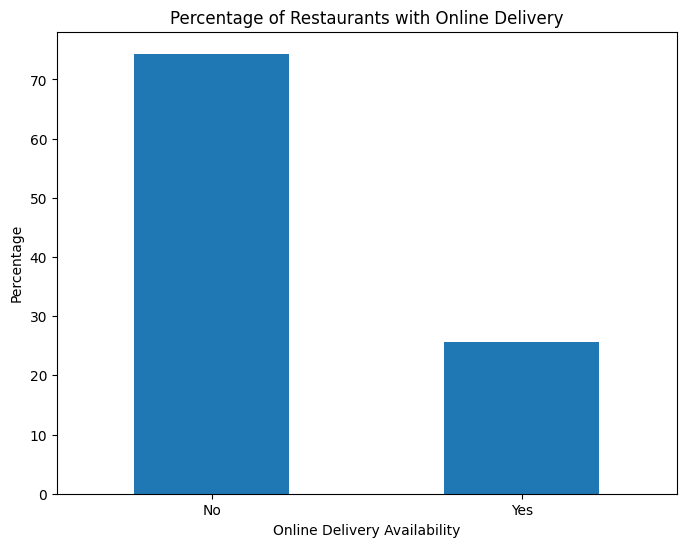

In [35]:
# prompt: #📌 6. Percentage of Restaurants with Online Delivery
# online_delivery_percent = df['Has_Online_delivery'].value_counts(normalize=True) * 100
# print(online_delivery_percent.astype(str) + '%')   bar chart

# Create the bar chart
plt.figure(figsize=(8, 6))
online_delivery_percent.plot(kind='bar')
plt.title('Percentage of Restaurants with Online Delivery')
plt.xlabel('Online Delivery Availability')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# **🍽️ Suggestions for Zomato Based on Data Insights**

**📍 1. Target Cities with High Demand But Low Supply**

Use case: If some cities have many users but fewer high-rated or affordable restaurants.

Suggestion: Incentivize new restaurant signups or promote cloud kitchens in those areas.

**🚴‍♂️ 2. Expand Online Delivery in High-Rating, Non-Delivery Areas**

Insight:
 If restaurants with high ratings don't offer online delivery, Zomato is missing out.

Suggestion: Partner with these restaurants to enable delivery and expand reach.

**⭐ 3. Boost Table Booking in High-End Areas**

Insight: Table booking may correlate with higher average prices and customer satisfaction.

Suggestion: Market the booking feature in premium dining zones, especially in metro cities.

**💸 4. Introduce Tiered Pricing Campaigns**

Insight: Restaurants fall into clear price buckets.

Suggestion: Offer targeted promotions for each segment (e.g., “Budget Bites” for ₹0–200, “Premium Picks” for ₹600+).

**🗓️ 5. Use Restaurant Opening Trends for Strategic Expansion**

Insight: Openings per month/quarter indicate market growth.

Suggestion: Forecast future hotspots and support onboarding in those timeframes/locations.

**💬 6. Enhance User Experience Based on Ratings**

Suggestion: Highlight restaurants with consistently high ratings and improve visibility for underrated but quality places (using personalized recommendations).

**🎯 7. Dashboarding for Internal Teams**

Suggestion: Build real-time dashboards for operations, marketing, and partner acquisition teams with filters like:

City

Rating buckets

Online delivery availability

Cuisine types